In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
import keras
import random
import matplotlib.pyplot as plt


In [ ]:
import os
import numpy as np
import cv2 as cv

In [ ]:
%cd /content/gdrive/MyDrive/Ocr

/content/gdrive/MyDrive/Ocr


In [ ]:
dataset_path = '/content/gdrive/MyDrive/Ocr/plate_ocr_dataset/'

In [ ]:

train_path = dataset_path + "train"
valid_path = dataset_path + "valid"
test_path = dataset_path + "test"

In [ ]:
class_names = subdirs = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'ch', 'd', 'ein', 'f', 'g', 'ghaf', 'ghein', 'h2', 'hj', 'j', 'k', 'kh', 'l', 'm', 'n', 'p', 'r', 's', 'sad', 'sh', 't', 'ta', 'th', 'v', 'y', 'z', 'za', 'zad', 'zal', 'zh']
num_classes = len(class_names)

In [ ]:
labels_nums = [i for i in range(0,len(class_names))]
print(labels_nums)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]


In [ ]:

train_imgs = []
train_labels = []
for indx, subdir in enumerate(subdirs):
  imgfolder = os.path.join(train_path, subdir)
  for imgname in os.listdir(imgfolder):
    img = cv.imread(os.path.join(imgfolder, imgname), 0)
    train_imgs.append(img)
    train_labels.append(labels_nums[indx])

c = list(zip(train_imgs, train_labels))
random.shuffle(c)
train_imgs, train_labels = zip(*c)

train_images = np.array(train_imgs)
train_labels = np.array(train_labels)

In [ ]:
valid_imgs = []
valid_labels = []
for indx, subdir in enumerate(subdirs):
  imgfolder = os.path.join(valid_path, subdir)
  if os.path.exists(imgfolder):
    for imgname in os.listdir(imgfolder):
      img = cv.imread(os.path.join(imgfolder, imgname), 0)
      valid_imgs.append(img)
      valid_labels.append(labels_nums[indx])

c = list(zip(valid_imgs, valid_labels))
random.shuffle(c)
valid_imgs, valid_labels = zip(*c)

test_images = np.array(valid_imgs)
test_labels = np.array(valid_labels)


In [ ]:
num=90
print(class_names[train_labels[num]])
print(train_labels[num])
plt.imshow(train_images[num])


NameError: ignored

In [ ]:

test_labels.shape

(792,)

In [ ]:

train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

In [ ]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=200)

Epoch 1/200
261/261 [==============================] - 2s 4ms/step - loss: 3.2719 - accuracy: 0.1451
Epoch 2/200
261/261 [==============================] - 1s 4ms/step - loss: 2.3335 - accuracy: 0.3662
Epoch 3/200
261/261 [==============================] - 1s 4ms/step - loss: 1.9376 - accuracy: 0.4492
Epoch 4/200
261/261 [==============================] - 1s 4ms/step - loss: 1.7327 - accuracy: 0.5065
Epoch 5/200
261/261 [==============================] - 2s 7ms/step - loss: 1.5876 - accuracy: 0.5480
Epoch 6/200
261/261 [==============================] - 2s 6ms/step - loss: 1.4928 - accuracy: 0.5697
Epoch 7/200
261/261 [==============================] - 2s 6ms/step - loss: 1.3965 - accuracy: 0.5973
Epoch 8/200
261/261 [==============================] - 2s 7ms/step - loss: 1.3156 - accuracy: 0.6199
Epoch 9/200
261/261 [==============================] - 2s 7ms/step - loss: 1.2416 - accuracy: 0.6412
Epoch 10/200
261/261 [==============================] - 1s 4ms/step - loss: 1.1788 - accura

In [ ]:

predictions = model.predict(test_images)

25/25 [==============================] - 0s 2ms/step


In [ ]:
model.save('saved_model/simple_ocr_plates_model')

#Test Model

In [ ]:

!zip -r /content/gdrive/MyDrive/Ocr/saved_model/simple_ocr_plates_model


zip error: Nothing to do! (/content/gdrive/MyDrive/Ocr/saved_model/simple_ocr_plates_model.zip)


In [ ]:
ocr_model = tf.keras.models.load_model('/content/gdrive/MyDrive/Ocr/saved_model/simple_ocr_plates_model')

In [ ]:
test_img_path = "/content/gdrive/MyDrive/Ocr/9.jpg"
test_img = cv.imread(test_img_path, 0)
test_img = np.expand_dims(test_img, axis=0)
predictions = ocr_model.predict(test_img)

1/1 [==============================] - 0s 254ms/step


In [ ]:

class_names[np.argmax(predictions)]

'1'

In [ ]:
test_path = '/content/gdrive/MyDrive/Ocr/plate_ocr_dataset/test'

In [ ]:

test_imgs = []
test_labels = []
for indx, subdir in enumerate(subdirs):
  imgfolder = os.path.join(test_path, subdir)
  if os.path.exists(imgfolder):
    for imgname in os.listdir(imgfolder):
      img = cv.imread(os.path.join(imgfolder, imgname), 0)
      test_imgs.append(img)
      test_labels.append(labels_nums[indx])

c = list(zip(test_imgs, test_labels))
random.shuffle(c)
test_imgs, test_labels = zip(*c)

test_images = np.array(test_imgs)
test_labels = np.array(test_labels)

In [ ]:
predictions = ocr_model.predict(test_images)

13/13 [==============================] - 0s 4ms/step


r
28


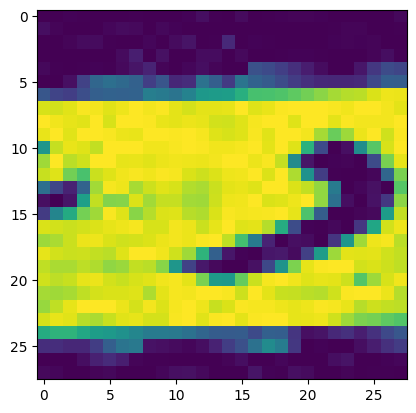

In [ ]:

num=15
print(class_names[np.argmax(predictions[num])])
print(np.argmax(predictions[num]))
plt.imshow(test_images[num])

13/13 [==============================] - 0s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

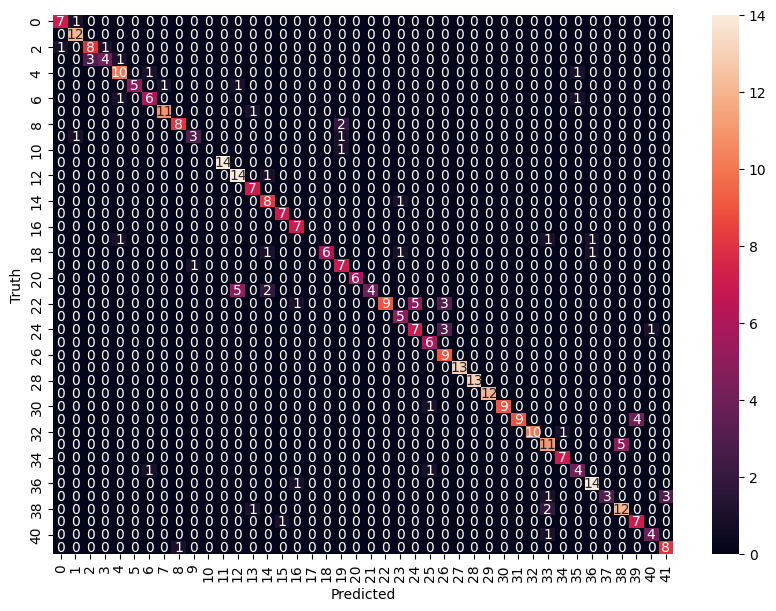

In [ ]:
y_predicted = ocr_model.predict(test_images)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=test_labels, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_labels, y_predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.8190954773869347
